Equation of straight line: y=4.68x + 0.14


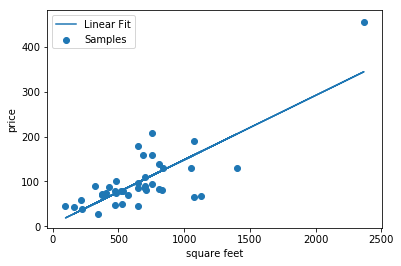

In [26]:
## Writing my own stochastic gradient descent, batch gradient descent and matrix solution to OLS.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def calcCost(diff):
    return 0.5*np.mean(np.multiply(diff,diff))

# batch gradient descent (use all samples for each iteration)
def bgd(alpha,theta,area,prices):
    h_prices = np.matmul(theta.T,area.T) # hypothesis prices
    diff = np.subtract(h_prices,prices)
    theta[0] = theta[0] - 0.5*alpha[0]*np.mean(diff) 
    deriv = np.multiply(diff,area[:,1])
    theta[1] = theta[1] - 0.5*alpha[1]*np.mean(deriv)
    print('Cost: %.3f, theta %.3f %.3f'%(calcCost(diff),theta[0],theta[1]))
    return theta

# stochastic gradient descent (change theta each sample)
def sgd(alpha,theta,area,prices):
    for index in range(0,prices.size):
        h_price = theta[0] + theta[1] * area[index,1] # hypothesis price
        diff = h_price - price[index] 
        theta[0] = theta[0] - alpha[0]*diff
        deriv = diff * area[index,1]
        theta[1] = theta[1] - alpha[1]*deriv
        print('Cost: %.3f, theta %.3f %.3f'%(calcCost(diff),theta[0],theta[1]))
    return theta

# normal method for linear regression (analytical)
def norm(area,prices):
    m1 = np.linalg.inv(np.matmul(area.T,area))
    m2 = np.matmul(area.T,prices)
    theta = np.matmul(m1,m2.T)
    return theta
    

# read airbnb data
df = pd.read_csv('../Airbnb/listings_summary.csv')

# filter data -> analyze price vs square_feet
df_np = df[['neighbourhood','price','square_feet']]

# drop nans, get rid of 0 areas
df_np = df_np.dropna()
df_np = df_np.loc[df['square_feet']>0]

# remove all non-digit chracters and convert prices to ints
df_np['price']= df_np['price'].str.replace('\D', '') 
df_np['price'] = df_np['price'].astype(int) // 100

# group by neighbourhoods
groups = df_np.groupby(['neighbourhood'])

# get all the price and square feet values for ONLY Mitte
mi = groups.get_group('Mitte')
price = mi.get('price').values
area = mi.get('square_feet').values

# perform linear regression using y=kx (find k that minimizes mean square cost)
method = 'norm' #bgd, sgd or normal
area_scaled = np.reshape(np.concatenate((np.ones(area.size),area)),(2,area.size)).T

# initial guess for theta (weightings) and alpha (learning rate)  
theta = np.reshape(np.zeros(2),(2,1))
alpha = np.reshape([0.03,0.000001],(2,1)) # Learning rate for sgd/bgd

# bgd method
if method == 'bgd':
    iterations = 30
    for i in range(0,iterations,1):
        theta = bgd(alpha,theta,area_scaled,price)

# sgd method
elif method == 'sgd':
    iterations = 30
    for i in range(0,iterations):
        theta = sgd(alpha,theta,area_scaled,price)
    
# normal method
elif method == 'norm':
    theta = norm(area_scaled,price)

theta = np.reshape(theta,(1,2))
h_final = np.matmul(theta,area_scaled.T)

print('Equation of straight line: y = %.2fx + %.2f' %(theta[0,0],theta[0,1]))

plt.plot(area,h_final.T)
plt.scatter(area,price)
plt.xlabel('square feet')
plt.ylabel('price')
plt.legend(['Linear Fit','Samples'])
plt.show()

Equation of straight line: y=0.05x + 41.74


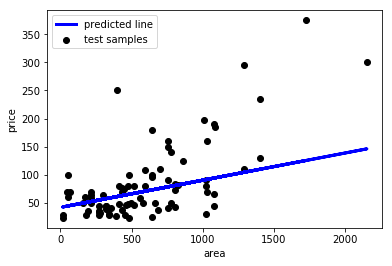

In [24]:
## Using Sci-Kit Learn to generate the linear model

import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# read airbnb data
df = pd.read_csv('../Airbnb/listings_summary.csv')

# filter data -> analyze price vs square_feet
df_np = df[['price','square_feet']]

# drop nans, get rid of 0 areas
df_np = df_np.dropna()
df_np = df_np.loc[df['square_feet']>0]

# remove all non-digit chracters and convert prices to ints
df_np['price']= df_np['price'].str.replace('\D', '') 
df_np['price'] = df_np['price'].astype(int) // 100

# extract all prices and areas
price = df_np['price'].values
area = df_np['square_feet'].values

# generate train and test data
X_train, X_test, y_train, y_test = train_test_split(area.reshape(-1,1),price.reshape(-1,1))
# train model
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)

# test model 
y_pred = regr.predict(X_test)

# print coefficients
print('Equation of straight line: y = %.2fx + %.2f' %(regr.coef_,regr.intercept_))

# plot prediction
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('area')
plt.ylabel('price')
plt.legend(['predicted line','test samples'])
plt.show()

